## Problem understanding

Breast cancer is the most common invasive cancer in women, and the second main cause of cancer death in women, after lung cancer.

Advances in screening and treatment have improved survival rates dramatically since 1989. There are around 3.1 million breast cancer survivors in the United States (U.S.). The chance of any woman dying from breast cancer is around 1 in 37, or 2.7 percent.

Analysis the datset can provide insights in identifying and mitigating the risks. 

Based upon the followinig three factors we have to **classify** whether the patient survived/will survive 5 years and longer or not.

Features:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)

Target variable:
1. Survival status (class attribute)
    - Value = 1: the patient survived 5 years or longer
    - Value = 2: the patient died within 5 year
    

Reference: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

**Note**: The kernel is still in progress and your feedback can help to improve it.

![image](https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2F3.bp.blogspot.com%2F-3yThenM3P_Y%2FT50A0xVgBeI%2FAAAAAAAAAi8%2F57FTjFJbg3s%2Fs1600%2Fbreastcancer.jpg&f=1)

## Import necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

import os
print(os.listdir("../input"))

['haberman.csv']


In [2]:
df = pd.read_csv('../input/haberman.csv')
df.columns = ['age', 'op_year', 'axil_nodes', 'surv_status']
df.head()

,age,op_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
# Since this is a binary classification problem
# replace surv_status value = 2 to 0 for the sake of readability
df['surv_status'].replace(2, 0, inplace=True)

## High level Analysis

In [4]:
# number of points
print('Shape of data', df.shape, '\nnumber of dimensions', df.ndim)

Shape of data (305, 4) 
number of dimensions 2


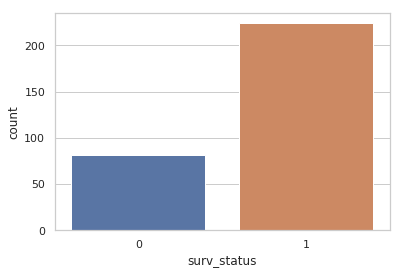

In [5]:
# datapoints per class - is it imbalanced?
sns.countplot(x='surv_status', data=df)
plt.show()

In [6]:
survived_count = sum(df['surv_status'] == 1)
died_count = sum(df['surv_status'] == 0)

ratio = survived_count/died_count \
            if survived_count > died_count \
                else died_count/survived_count

In [7]:
round(ratio, 2)

2.77

Data points of survivors > 2x Number of demised patients.

Having an imbalanced dataset can impact the model performance.

In [8]:
df.describe()

,age,op_year,axil_nodes,surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.734426
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age            305 non-null int64
op_year        305 non-null int64
axil_nodes     305 non-null int64
surv_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [10]:
# features
X = df.iloc[:, :3]

# classes
y = df.iloc[:, 3]

In [11]:
X.shape

(305, 3)

In [12]:
y.shape

(305,)

## Which individual features are useful for classification? 

Univariate analysis

### Probability Density Function

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


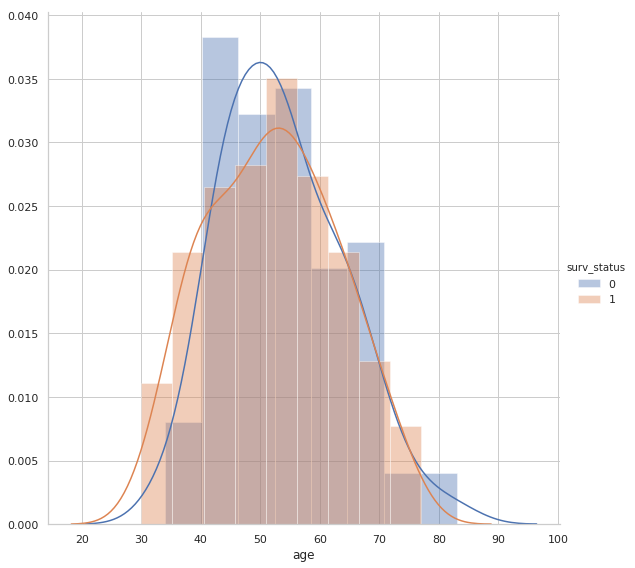

In [13]:
# histogram of age
ax = sns.FacetGrid(df, hue='surv_status', height=8) \
                .map(sns.distplot, 'age') \
                .add_legend()

It can be seen that survival status is tightly overlapped with one another, hence we can conclude that `age` wont contribute much in identification of classes correctly.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


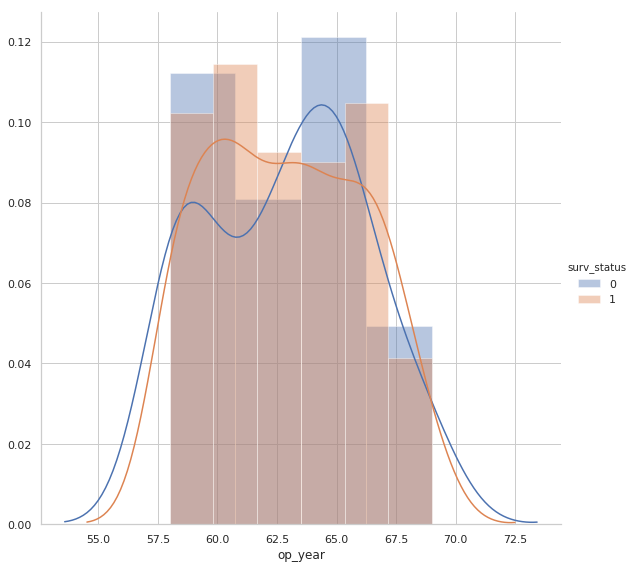

In [14]:
# histogram of operation year
ax = sns.FacetGrid(df, hue='surv_status', height=8) \
    .map(sns.distplot, 'op_year') \
    .add_legend()
plt.show()

Similar to age, operation year cannot be leveraged to classify the survival status.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


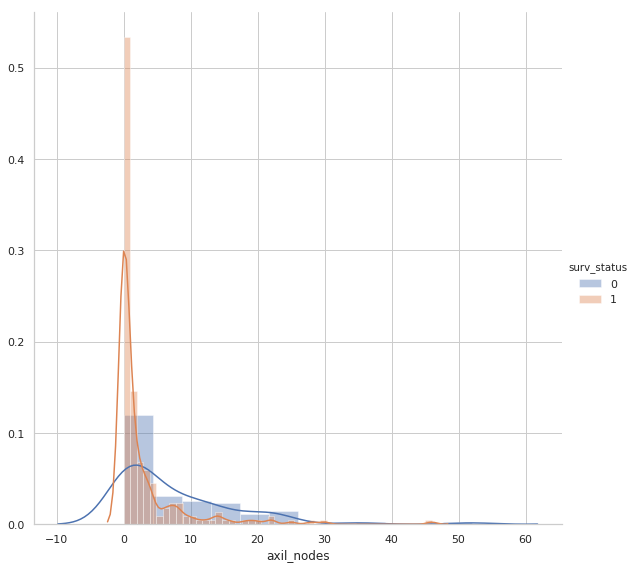

In [15]:
# histogram of axil nodes
ax = sns.FacetGrid(df, hue='surv_status', height=8) \
    .map(sns.distplot, 'axil_nodes') \
    .add_legend()

It can be observed that if the count of positive axiliary nodes < `3` then the person is more likely to survive the disease.

### Box plot

In [16]:
def box_plot(y_axis, df):
#     sns.boxplot(x='surv_status', y=y_axis, data=df)
    sns.catplot(x='surv_status', y=y_axis, data=df, 
                kind='box', height=8, aspect=.7)
    plt.show()

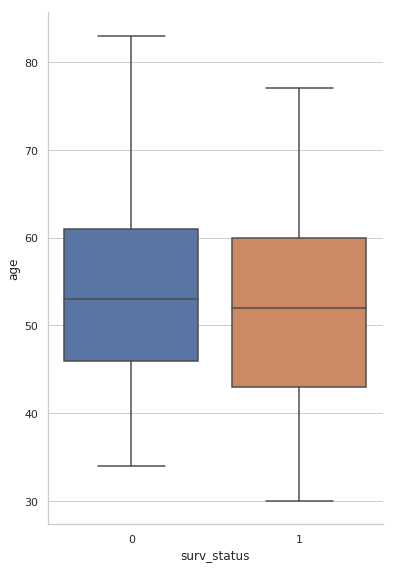

In [17]:
box_plot('age', df)

For the feature `age`, if 50% of the population lie between 
- 46 to 61 then survival status is dead
- 44 to 60 then survival status is alive

This does not help in clearly separating categories.

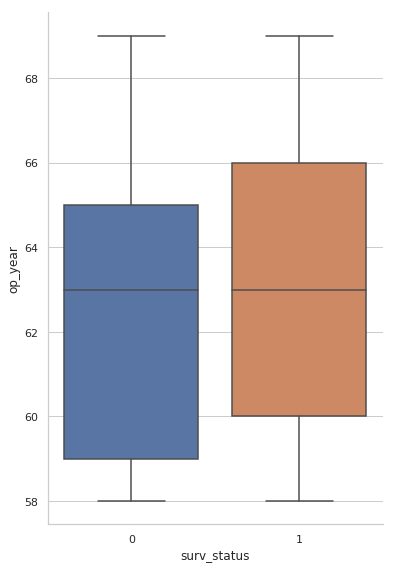

In [18]:
box_plot('op_year', df)

Operation year follows the below rule, if the year is
- Between 1959 to 1965 then the patient might be dead.
- Between 1960 to 1966 then the patient has chance of survival.

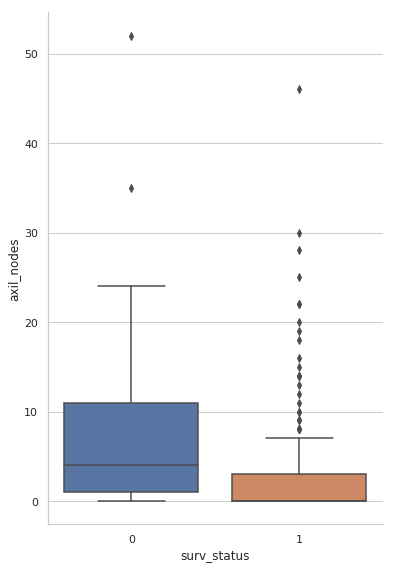

In [19]:
box_plot('axil_nodes', df)

### Violin plot

A violin plot combines the benefits of the previous ones (pdf and bar chart) and projects a combined graph.

In [20]:
def violin_plot(feature, df):
    sns.catplot(x='surv_status', y=feature, data=df, kind='violin', height=8)
    plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


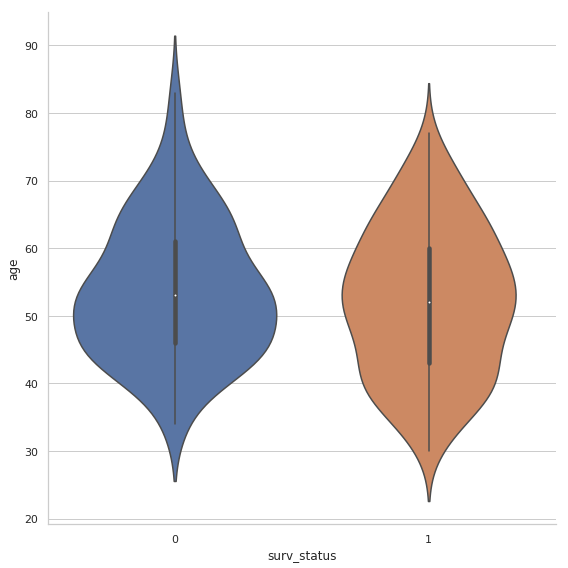

In [21]:
violin_plot('age', df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


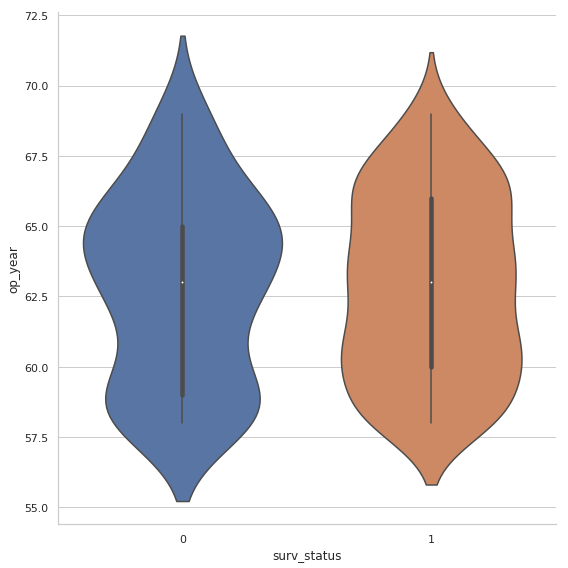

In [22]:
violin_plot('op_year', df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


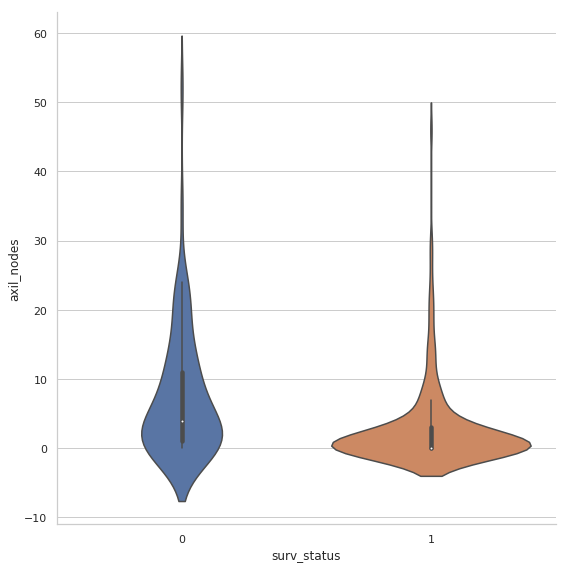

In [23]:
violin_plot('axil_nodes', df)

## Do combination of features help in classification ?
Bivariate analysis

By comparing two features we can observe how they are inter dependent and be useful for classification.

### Pair plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


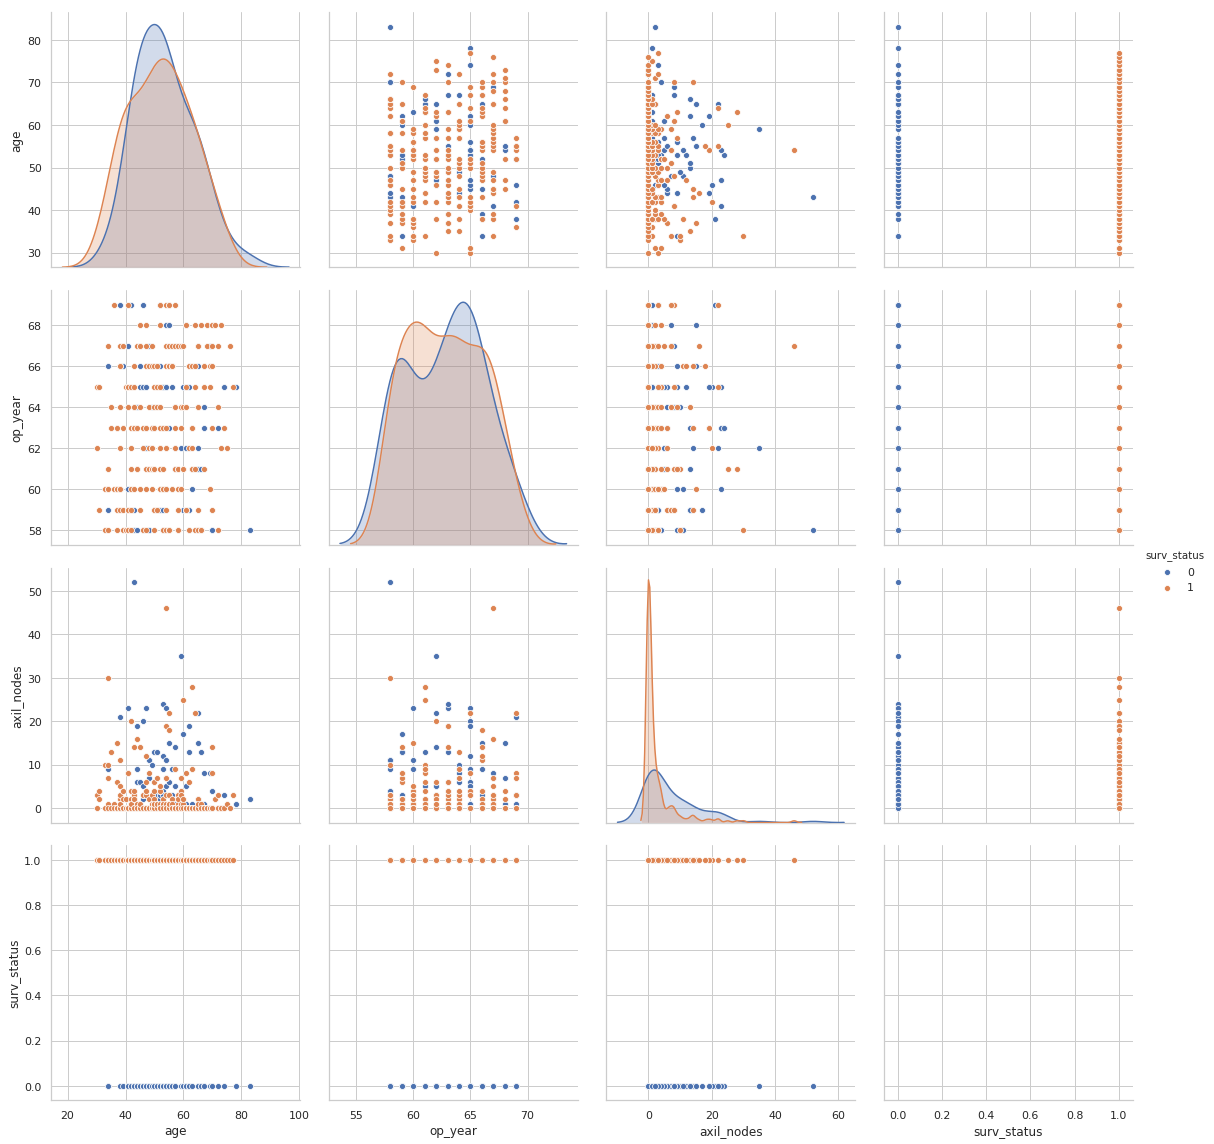

In [24]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue='surv_status', height=4);
plt.show()

The following observations were made
- None of the two features combined could give a perfect classifier
- Axil nodes in conjunction with other features was able to coparatively classify well.

### Heatmap

In [25]:
df.corr()

,age,op_year,axil_nodes,surv_status
age,1.000000,0.092623,-0.066548,-0.064351
op_year,0.092623,1.000000,-0.003277,0.004076
axil_nodes,-0.066548,-0.003277,1.000000,-0.286191
surv_status,-0.064351,0.004076,-0.286191,1.000000


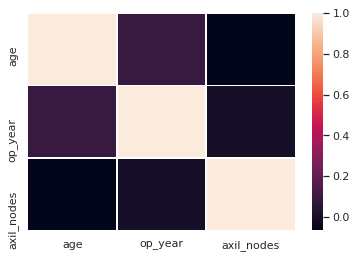

In [26]:
sns.heatmap(X.corr(), linewidths=.5)

It can be seen that `age` is having low correlation with `op_year`. 

Whereas, `axil_nodes` shows almost nil correlation with other features.

## Conclusion

Finally, we can conclude that axil_node is the most important to determine if the patient Will Survive Breast Cancer.